In [4]:
import pandas as pd
import numpy as np
import sys

In [5]:
df=pd.read_csv('hyundai.csv')

In [6]:
df.describe()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,model
count,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.0,725.000000,725.000000,725.000000
mean,5.504828,2013.638621,50148.853793,1.318621,1.128276,1.187586,19.697172,1299.600000,89.874372,5.0,9.543448,4.836428,2.343448
std,2.947804,2.747505,36798.347812,0.469216,0.334628,0.434189,2.235651,168.853609,18.158003,0.0,2.572802,1.898248,1.173770
min,0.000000,2006.000000,1000.000000,1.000000,1.000000,1.000000,13.900000,1086.000000,66.700000,5.0,6.500000,1.500000,1.000000
25%,3.000000,2012.000000,30566.000000,1.000000,1.000000,1.000000,18.500000,1197.000000,78.900000,5.0,7.500000,3.400000,1.000000
50%,6.000000,2014.000000,47000.000000,1.000000,1.000000,1.000000,18.900000,1197.000000,81.860000,5.0,10.000000,4.700000,2.000000
75%,8.000000,2016.000000,64000.000000,2.000000,1.000000,1.000000,21.900000,1396.000000,90.000000,5.0,10.000000,6.000000,3.000000
max,10.000000,2019.000000,620000.000000,3.000000,2.000000,4.000000,24.800000,1599.000000,126.320000,5.0,13.500000,14.280000,4.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 15 columns):
Name                 725 non-null object
Location             725 non-null int64
Year                 725 non-null int64
Kilometers_Driven    725 non-null int64
Fuel_Type            725 non-null int64
Transmission         725 non-null int64
Owner_Type           725 non-null int64
Mileage              725 non-null float64
Engine               725 non-null int64
Power                725 non-null float64
Seats                725 non-null float64
New_Price            725 non-null float64
Price                725 non-null float64
make                 725 non-null object
model                725 non-null int64
dtypes: float64(5), int64(8), object(2)
memory usage: 85.0+ KB


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

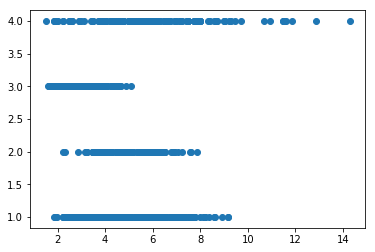

In [9]:
plt.scatter(df['Price'],df['model'])

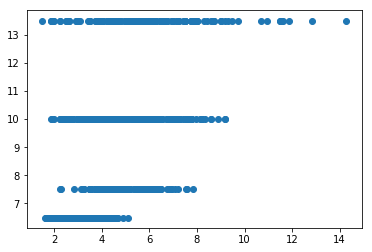

In [10]:
plt.scatter(df['Price'],df['New_Price'])

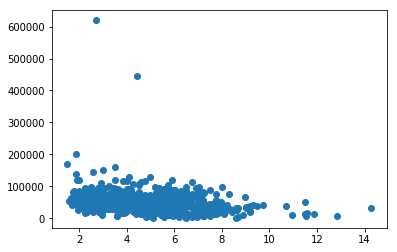

In [11]:
plt.scatter(df['Price'],df['Kilometers_Driven'])

In [12]:
newdf=df.drop(columns=['Name','make'])

In [13]:
newdf=pd.get_dummies(newdf,columns=['Fuel_Type','Owner_Type','Location','Transmission','model','Seats'])

### multivariate linear regression

In [14]:
from sklearn.model_selection import train_test_split


In [15]:
X=newdf.drop('Price',axis=1).values

In [16]:
y=newdf['Price'].values

In [17]:
newdf.columns

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'New_Price',
       'Price', 'Fuel_Type_1', 'Fuel_Type_2', 'Fuel_Type_3', 'Owner_Type_1',
       'Owner_Type_2', 'Owner_Type_3', 'Owner_Type_4', 'Location_0',
       'Location_1', 'Location_2', 'Location_3', 'Location_4', 'Location_5',
       'Location_6', 'Location_7', 'Location_8', 'Location_9', 'Location_10',
       'Transmission_1', 'Transmission_2', 'model_1', 'model_2', 'model_3',
       'model_4', 'Seats_5.0'],
      dtype='object')

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [19]:
def featureNormalization(X):
    X_Norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])
    mu = np.mean(X,axis=0)
    sigma = np.std(X,axis=0)
    X_Norm = (X-mu)/sigma
    return X_Norm , mu , sigma

In [20]:
X_cont=X_train[:,:6]
X_disc=X_train[:,6:]

In [21]:
X_norm, mu, sigma = featureNormalization(X_cont)

In [22]:
X_train=np.concatenate([X_norm,X_disc],axis=1)

In [23]:
m=y.size
X_train = np.concatenate([np.ones((X_train.shape[0], 1)), X_train], axis=1)

In [24]:
def computeCost(X,y,theta):
    h=np.dot(X,theta)
    m=y.size
    J=0
    J=(1/(2*m))*np.sum(np.square(np.dot(X,theta)-y))
    return J

In [25]:
def GradientDescent(X,y,theta,alpha,num_iters):
    theta=theta.copy()
    J_history=[]
    m=y.size
    for i in range(num_iters):
        theta=theta-(alpha/m)*((np.dot(X,theta)-y).dot(X))
        J=computeCost(X,y,theta)
        J_history.append(J)
    return J_history ,theta

In [26]:
computeCost(X_train,y_train,[0]*32)

13.573573020257829

In [27]:
J_history , theta = GradientDescent(X_train,y_train,[0.1]*32,0.02,2500)

Text(0, 0.5, 'cost function value')

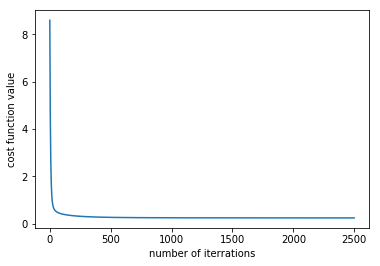

In [28]:
plt.plot(np.arange(len(J_history)),J_history)
plt.xlabel('number of iterrations')
plt.ylabel('cost function value')

In [29]:
X_test=np.concatenate([np.ones((X_test.shape[0], 1)), X_test], axis=1)
y_pred=np.dot(X_test,theta)

In [33]:
from sklearn import linear_model

In [34]:
lin1=linear_model.LinearRegression()

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [38]:
lin1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
ypred=lin1.predict(X_test)

In [43]:
np.square(np.subtract(ypred,y_test)).mean()

0.5827636506644873